# Sentiment Analysis

Is it possible to track the positivity and negativity of MP's tweets? Let's attempt this by:

1. Train a classifier
2. Run it on the tweets in tweets.csv

## Stage 1: Train a Classifier

Use NLTK and Sklearn to create a classifier for the sentiment of tweets.

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

### Training Data

Found link to some training data: 

http://thinknook.com/twitter-sentiment-analysis-training-corpus-dataset-2012-09-22/

Try and use this to train a model. Hopefully it will generalise to our dataset well. Dataset contains a lot of tweets ~ 1.5 million.

The tweets are classed as either:

* 0 = Negative Sentiment
* 1 = Positive Sentiment

In [3]:
tweet_df = pd.read_csv('../data/Sentiment Analysis Dataset.csv',usecols=[1,2,3] )

In [50]:
tweet_df.head()

,Sentiment,SentimentSource,SentimentText,processed_text
0,0,Sentiment140,is so sad for my APL friend.............,is so sad for my apl friend.............
1,0,Sentiment140,I missed the New Moon trailer...,i missed the new moon trailer...
2,1,Sentiment140,omg its already 7:30 :O,omg its already 7:30 :o
3,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,.. omgaga. im sooo im gunna cry. i've been at this dentist since 11.. i was suposed 2 just get a crown put on (30mins)...
4,0,Sentiment140,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me!!! t_t


In [4]:
tweet_df['SentimentSource'].value_counts()

Sentiment140    1577269
Kaggle             1345
Name: SentimentSource, dtype: int64

In [5]:
tweet_df['Sentiment'].value_counts()

1    790178
0    788436
Name: Sentiment, dtype: int64

### Pre-Process Text

* Remove mentions, hashtags and urls and make lower case

In [6]:
def process_text(row):
    """
    Remove URLs, mentions, hashtags
    
    """
    
    string = row['SentimentText'] 
    
    string = re.sub(r'http\S*\b', '', string)
    string = re.sub(r'pic.\S*\b', '', string)
    string = re.sub(r'@\S*\b', '', string)
    string = re.sub(r'#', '', string)    
    
    return string.lower()

In [7]:
tweet_df['processed_text'] = tweet_df.apply(process_text, axis=1)

In [8]:
tweet_df.head()

,Sentiment,SentimentSource,SentimentText,processed_text
0,0,Sentiment140,is so sad for my APL frie...,is so sad for my apl frie...
1,0,Sentiment140,I missed the New Moon trail...,i missed the new moon trail...
2,1,Sentiment140,omg its already 7:30 :O,omg its already 7:30 :o
3,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,.. omgaga. im sooo im gunna cry. i'...
4,0,Sentiment140,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...


### Build and Train a Model

We will use a standard document classifier using sklearn. Each tweet is classified as either 1=positive or 0=negative.

Three stages to the classifier:

1. CountVectorizer - make a sparse array of the words in the corpus along with the frequencies.
2. tf-idf - Adjust the frequency this for tweet length and how often it occurs in other documents. See wiki for more info
3. Train classifier. We will try Naïve Bayes first


Some things to consider:

1. Do we get rid of URLs?


In [9]:
# split into data and target

X = tweet_df['processed_text']
y = tweet_df['Sentiment']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
# Make a pipeline
tweet_classifier = Pipeline([('count_vectorise', CountVectorizer(ngram_range=(1,2))),
    ('tf-idf', TfidfTransformer()),
    ('classify', MultinomialNB()),
    ])

In [12]:
tweet_classifier.fit(X_train, y_train)

/Applications/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Pipeline(steps=[('count_vectorise', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
  ..._tf=False, use_idf=True)), ('classify', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [13]:
pred = tweet_classifier.predict(X_test)

/Applications/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [14]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.78      0.84      0.81    236567
          1       0.83      0.76      0.79    237018

avg / total       0.80      0.80      0.80    473585



In [15]:
print(confusion_matrix(y_test, pred))

[[198815  37752]
 [ 56085 180933]]


## Stage 2 - Apply to MP Dataset

In [16]:
#get mp tweet dataset

mp_tweets = pd.read_csv('../data/processed_tweets.csv')

In [17]:
mp_tweets = mp_tweets.drop('Unnamed: 0', axis=1)

In [18]:
mp_tweets.head()

,user_name,constituency,party,gender,tweet_id,permalink,text,date,retweets,favourites,replies,party_new
0,skinnock,Aberavon,Labour,Male,947017416047058944,https://twitter.com/SKinnock/status/9470174160...,Devastating resignation letter from Andrew Ado...,2017-12-30 08:12:01,17,43,11,Labour
1,skinnock,Aberavon,Labour,Male,944285195372548097,https://twitter.com/SKinnock/status/9442851953...,The gov need to act to allow more flexibility ...,2017-12-22 19:15:09,2,5,2,Labour
2,skinnock,Aberavon,Labour,Male,943841995390423040,https://twitter.com/SKinnock/status/9438419953...,Here are the fabled sector analyses. Damp squi...,2017-12-21 13:54:02,21,29,8,Labour
3,skinnock,Aberavon,Labour,Male,943595206225559552,https://twitter.com/SKinnock/status/9435952062...,"Fallon, Patel and now Green. Three strikes and...",2017-12-20 21:33:22,7,31,5,Labour
4,skinnock,Aberavon,Labour,Male,943552279189258245,https://twitter.com/SKinnock/status/9435522791...,Waiting to hear from @DavidGauke re my concern...,2017-12-20 18:42:48,3,1,1,Labour


In [19]:
# Now preprocess the data.
# N.B - slightly different as we have spaces within the URLs in this dataset.

def process_text_mp(row):
    """
    Remove URLs, mentions, hashtags from text
    
    """
    
    string = row['text']
    
    if pd.isna(string):
        
        return ''
    
    string = re.sub(r'(http|pic.).*$', '', string)
    string = re.sub(r'@\S*\b', '', string)
    string = re.sub(r'#', '', string)    
    
    return string.lower()

In [20]:
mp_tweets['processed_text'] = mp_tweets[['text']].apply(process_text_mp, axis=1)

In [21]:
mp_tweets = mp_tweets[mp_tweets['processed_text'] != ''] #remove blank

In [22]:
X = mp_tweets['processed_text']

In [23]:
y_class = tweet_classifier.predict(X)
y_prob = tweet_classifier.predict_proba(X)

/Applications/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


## Step 3 - Analyse Data

In [24]:
#Attach to mp_tweet dataframe

mp_tweets['sentiment_class'] = y_class # class of the tweet 0=negative, 1=positive

In [25]:
mp_tweets['positive_prob'] = y_prob[:,1] #probability the tweet is positive

In [26]:
#What are the proportions?
mp_tweets['sentiment_class'].value_counts()

1    1808939
0     890628
Name: sentiment_class, dtype: int64

/Applications/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


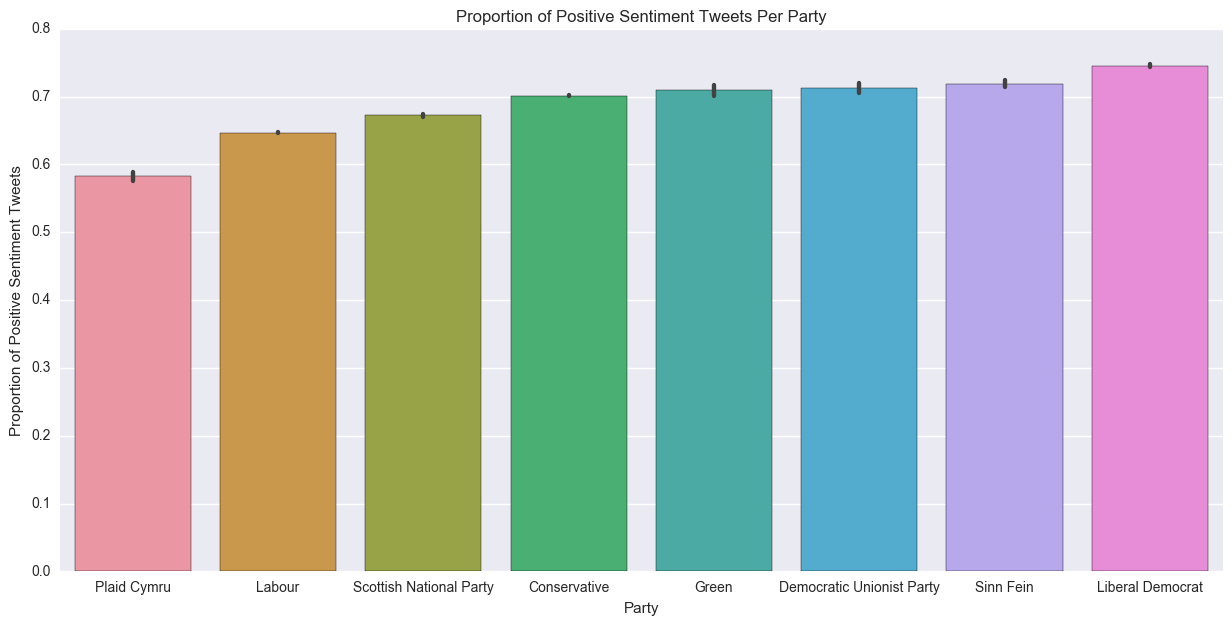

In [27]:
# Look on a per party basis
# Look at the mean number of positive tweets for each party

order =list(mp_tweets.groupby('party_new').mean()['sentiment_class'].sort_values(ascending=True).index)

fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(x='party_new', y='sentiment_class', data=mp_tweets, order=order)

plt.title('Proportion of Positive Sentiment Tweets Per Party')
plt.xlabel('Party')
plt.ylabel('Proportion of Positive Sentiment Tweets')

### Sentiment Change Over Time

In [28]:
mp_tweets['date'] = pd.to_datetime(mp_tweets['date'])

def get_day_of_week(row):
    
    return row['date'].weekday()

def get_hour_of_day(row):
    
    return row['date'].hour
    
def year_month(row):
    
    return '{year}-{month}'.format(year=row['date'].year, month=row['date'].month)

def unique_day(row):
    
    return str(row['date'].date())

mp_tweets['day'] = mp_tweets[['date']].apply(get_day_of_week, axis=1)
mp_tweets['hour'] = mp_tweets[['date']].apply(get_hour_of_day, axis=1)
mp_tweets['year_month'] = mp_tweets[['date']].apply(year_month, axis=1)
mp_tweets['unique_day'] = mp_tweets[['date']].apply(unique_day, axis=1)

In [29]:
grouped = mp_tweets[['sentiment_class', 'year_month', 'party_new']].groupby(['year_month', 'party_new']).mean()

In [30]:
grouped.head()

sentiment_class
year_month party_new                        
2007-12    Labour                   0.769231
2008-1     Labour                   0.659091
2008-10    Conservative             0.636364
           Labour                   0.652174
           Liberal Democrat         0.391304

In [31]:
grouped.reset_index(inplace=True)
grouped['year_month'] =pd.to_datetime(grouped['year_month'])

In [32]:
grouped.head()

,year_month,party_new,sentiment_class
0,2007-12-01,Labour,0.769231
1,2008-01-01,Labour,0.659091
2,2008-10-01,Conservative,0.636364
3,2008-10-01,Labour,0.652174
4,2008-10-01,Liberal Democrat,0.391304


In [33]:
grouped = grouped[grouped['year_month'] < '2017-12-01']

In [34]:
time_data = grouped.pivot_table(index='year_month', columns='party_new')

time_data.columns = time_data.columns.droplevel()

In [35]:
time_data.head()

party_new,Conservative,Democratic Unionist Party,Green,Labour,Liberal Democrat,Plaid Cymru,Scottish National Party,Sinn Fein
year_month,,,,,,,,
2007-12-01,NaN,NaN,NaN,0.769231,NaN,NaN,NaN,NaN
2008-01-01,NaN,NaN,NaN,0.659091,NaN,NaN,NaN,NaN
2008-02-01,NaN,NaN,NaN,0.730769,NaN,NaN,NaN,NaN
2008-03-01,0.615385,NaN,NaN,0.678571,NaN,NaN,NaN,NaN
2008-04-01,0.516129,NaN,NaN,0.705882,NaN,NaN,NaN,NaN


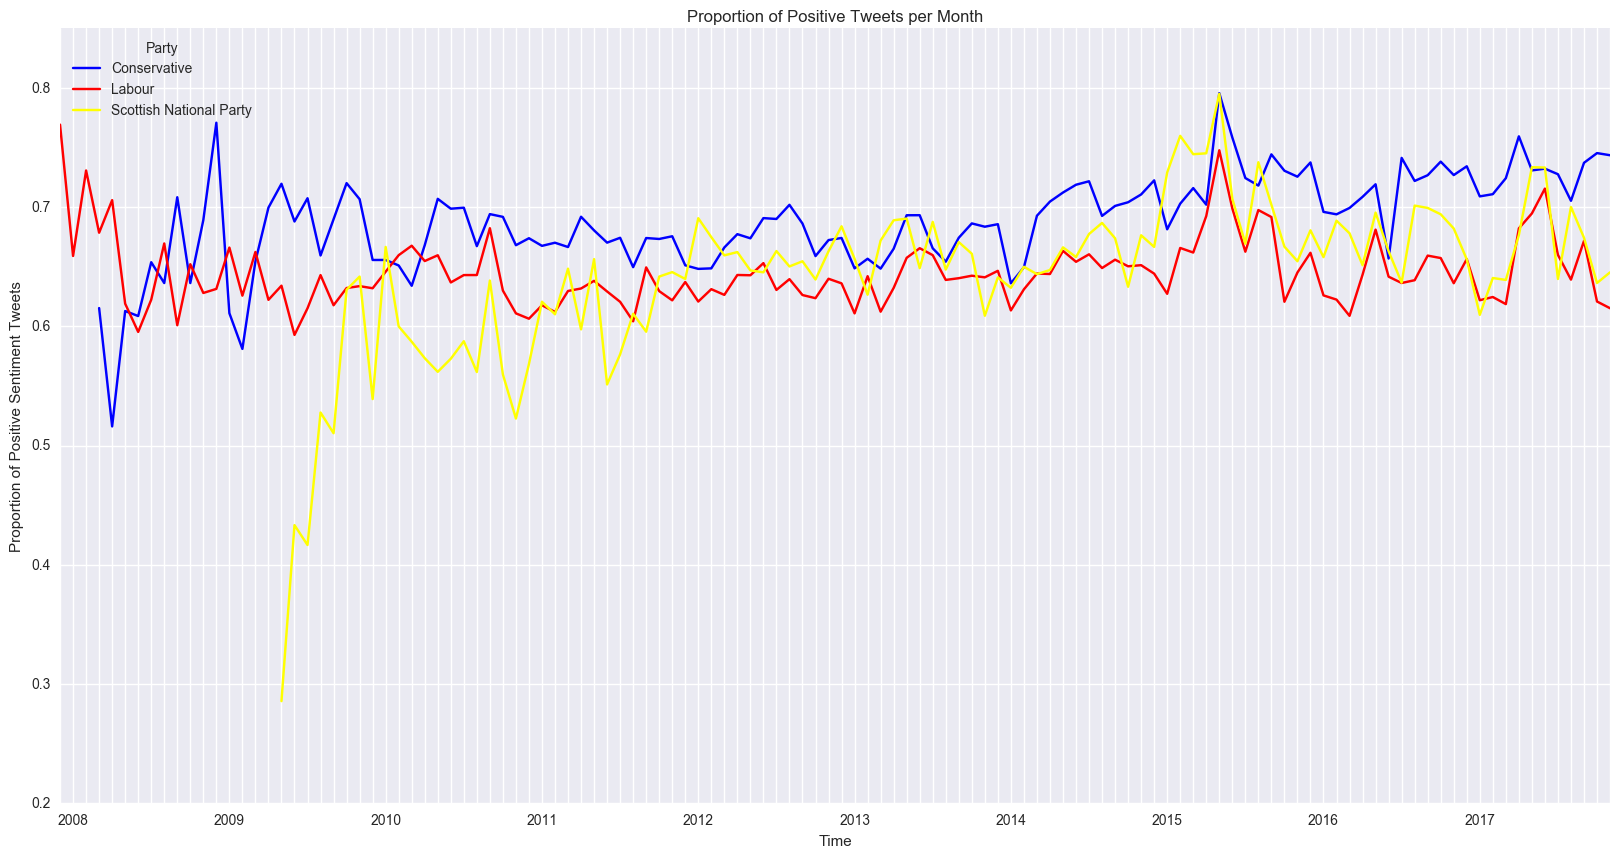

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
colours = ['b', 'r', 'yellow']
time_data[['Conservative', 'Labour', 'Scottish National Party']].plot(ax=ax, color=colours,xticks=time_data.index)
plt.title('Proportion of Positive Tweets per Month')
plt.ylabel('Proportion of Positive Sentiment Tweets')
plt.xlabel('Time')
plt.ylim(0.2,0.85)
plt.legend(title='Party', loc='upper left')

### Look at Probabilities of Positive Sentiment

Above analysis looked at the proportion of positive sentiment tweets. Now let's look at the raw probability.

In [37]:
# Most positive tweets
pd.set_option('display.max_colwidth',-1)

mp_tweets[['processed_text', 'positive_prob', 'user_name', 'party_new']].sort_values('positive_prob', ascending=False).head(10)

,processed_text,positive_prob,user_name,party_new
489541,thanks to & for the ff and thank you for following,0.998997,tracey_crouch,Conservative
2076956,you’re most welcome . thank you for your kind words.,0.998955,tandhesi,Labour
830637,you're very welcome and thanks for your support,0.998669,benpbradshaw,Labour
2087547,""" : thanks for the follow."" / you're very welcome - thanks for having me!",0.998606,djwarburton,Conservative
88642,""" : thank you for the follow "" you're welcome. thanks for the encouraging work you do!",0.998504,grobinsondup,Democratic Unionist Party
530247,you're welcome and thank you.,0.998484,tobyperkinsmp,Labour
2428867,you're welcome - and thank you!,0.998484,helenjonesmp,Labour
834632,you are most welcome and thanks for coming,0.998461,benpbradshaw,Labour
992574,"your welcome, my pleasure",0.998431,brandonlewis,Conservative
877905,you are most welcome!! and thank you back! ;-),0.998414,ianmearnsmp,Labour


In [38]:
# Most positive tweets
mp_tweets[['processed_text', 'positive_prob', 'user_name', 'party_new']].sort_values('positive_prob', ascending=True).head(10)

,processed_text,positive_prob,user_name,party_new
1812205,"not feeling too great this morning, runny nose and sore throat.",0.003202,andrew4pendle,Conservative
747330,"just found out that sadly my mum has broken her arm, and is upset at not being able to go running for a few weeks (no thatcher jokes pls!)",0.003717,joswinson,Liberal Democrat
258166,very sad news. my condolences goes out to the families in brent .,0.004175,dawnbutlerbrent,Labour
1229583,"have a cold, pounding headache and still feel fragile after being sick through the night. :-(",0.004299,wesstreeting,Labour
895778,"argh - has been ill since sunday, and now i'm starting to feel shivvery with sore throat. not good. :-(",0.004379,alisonthewliss,Scottish National Party
1580561,"very poorly office tonight while waiting on votes. i have a bad cold and sore ankle after i fell down the stairs this afternoon, and has food poisoning. avoid!",0.004475,danirowley,Labour
804518,my hayfever is killing me.,0.004528,kateosamor,Labour
973747,so terribly sad to hear has passed away. sincere condolences to his family and close friends. 2015 lab mps shocked & saddened.,0.004720,onnmel,Labour
1517110,"oh no that's awful, so sorry",0.004811,hannahb4livimp,Scottish National Party
969844,"such sad news, my condolences to his fiancé and his family",0.004919,toniaantoniazzi,Labour


/Applications/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


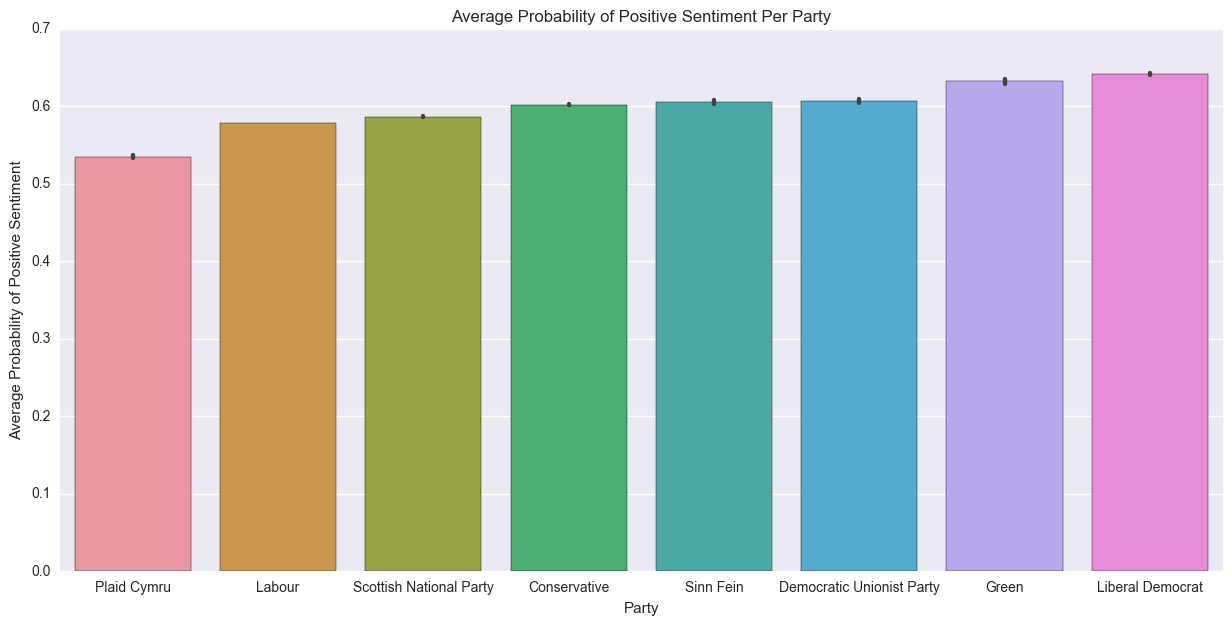

In [39]:
# Really seems to be classifying those tweets well!

# Look on a per party basis to see if the probability looks difference from the class based figure

order =list(mp_tweets.groupby('party_new').mean()['positive_prob'].sort_values(ascending=True).index)

fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(x='party_new', y='positive_prob', data=mp_tweets, order=order)

plt.title('Average Probability of Positive Sentiment Per Party')
plt.xlabel('Party')
plt.ylabel('Average Probability of Positive Sentiment')

In [40]:
# Does sentiment correlate with anything?


mp_tweets[['retweets','favourites','replies','positive_prob']].corr()

,retweets,favourites,replies,positive_prob
retweets,1.000000,0.926310,0.550505,-0.022989
favourites,0.926310,1.000000,0.520833,-0.010831
replies,0.550505,0.520833,1.000000,-0.026004
positive_prob,-0.022989,-0.010831,-0.026004,1.000000


Doesn't look like it does! A slight negative correlation if anything.

Now let's look at any correlations between the time the tweet occured and sentiment

In [41]:
time_df = mp_tweets.pivot_table(values='positive_prob', index='day', columns='hour')

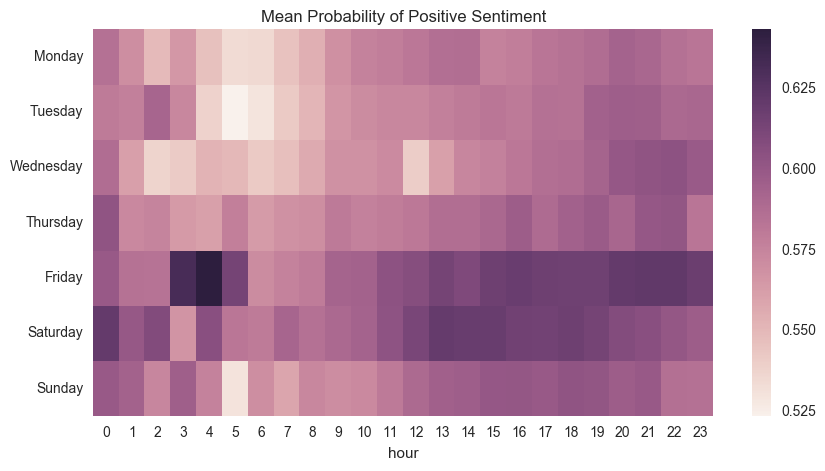

In [42]:
index = ['Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday',
        'Sunday']

time_df.index =index

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(data=time_df)

plt.title('Mean Probability of Positive Sentiment')

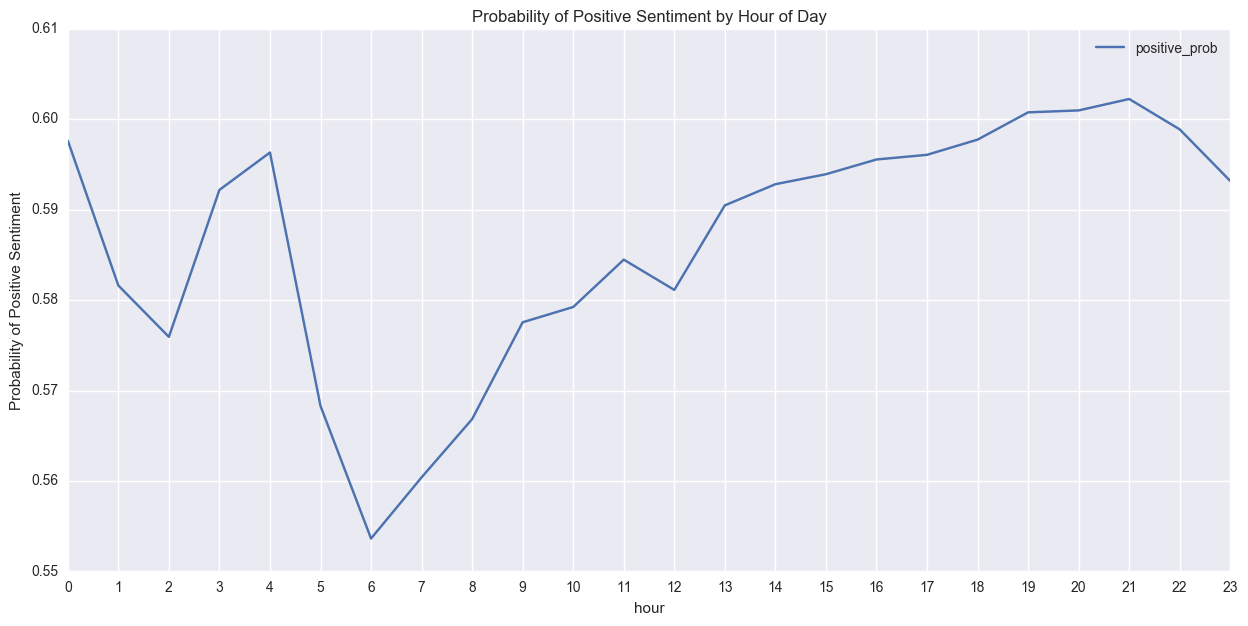

In [43]:
# by hour of the day

grouped = mp_tweets[['positive_prob', 'hour']].groupby('hour').mean()
fig, ax = plt.subplots(figsize=(15,7))

grouped.plot(ax=ax)
plt.title('Probability of Positive Sentiment by Hour of Day')
plt.xticks(np.arange(24))
plt.ylabel('Probability of Positive Sentiment')

### Worst and Best Days

In [44]:
# #only consider dates after 2010 when we have a lot of data
filtered_df = mp_tweets[(mp_tweets['date'] > '2010-01-01') & (mp_tweets['date'] < '2017-12-20')] 

In [45]:
grouped_mean = filtered_df.groupby('unique_day').mean()
grouped_count = filtered_df.groupby('unique_day').count() #Check we don't just have a few tweets which throw us off

In [46]:
grouped = grouped_mean.merge(grouped_count[['retweets']], left_index=True, right_index=True)

In [47]:
# Worst Days
grouped.sort_values('positive_prob').head(10)

,tweet_id,retweets_x,favourites,replies,sentiment_class,positive_prob,day,hour,retweets_y
unique_day,,,,,,,,,
2017-05-23,8.669562e+17,60.054204,159.465708,6.970133,0.305310,0.365485,1.0,10.469027,904
2010-06-22,1.677475e+10,3.005000,0.107500,0.000000,0.480000,0.494931,1.0,14.565000,400
2016-06-16,7.434449e+17,32.196657,42.824484,2.317109,0.502950,0.498583,3.0,14.635693,2034
2011-08-08,1.005759e+17,12.150209,0.343533,3.472879,0.490960,0.502334,0.0,15.091794,719
2016-03-22,7.122761e+17,12.564586,12.661103,2.325109,0.511611,0.502497,1.0,13.404935,1378
2017-06-04,8.713481e+17,134.896200,308.293791,19.479147,0.501390,0.502631,6.0,13.325301,1079
2012-03-21,1.824838e+17,3.479014,0.139907,1.502332,0.499001,0.510738,2.0,14.626249,1501
2010-01-02,7.300503e+09,0.104000,0.016000,0.000000,0.528000,0.515523,5.0,13.328000,125
2011-08-09,1.009243e+17,4.005045,0.221998,1.984864,0.533804,0.516395,1.0,14.158426,991


Some dates stand out here - terror attacks, assassinations, riots and budgets. Bit depressing to be honest.

In [48]:
#Best days

grouped.sort_values('positive_prob', ascending=False).head(10)

,tweet_id,retweets_x,favourites,replies,sentiment_class,positive_prob,day,hour,retweets_y
unique_day,,,,,,,,,
2015-05-08,5.966440e+17,14.262835,24.600000,3.632695,0.874074,0.767492,4.0,12.386973,3915
2015-05-09,5.970352e+17,4.720682,5.270789,1.888699,0.855011,0.755711,5.0,14.312154,2345
2015-05-07,5.962982e+17,9.037223,11.420744,1.716228,0.866792,0.753115,3.0,13.490381,4782
2017-06-09,8.731327e+17,73.295952,207.839880,12.502849,0.854273,0.749404,4.0,11.513943,3335
2017-06-08,8.728068e+17,39.730633,92.472804,6.096068,0.848599,0.735259,3.0,13.953143,4247
2016-06-17,7.437953e+17,6.306052,11.656484,0.963689,0.810951,0.727535,4.0,13.835735,1735
2017-06-10,8.735289e+17,38.093881,86.696871,7.797758,0.832788,0.727529,5.0,13.745913,2141
2014-12-25,5.481091e+17,2.745928,3.241042,1.094463,0.872964,0.721010,3.0,13.045603,307
2015-05-11,5.977722e+17,6.335736,7.641092,2.171988,0.846035,0.720606,0.0,15.114830,1942


Seem to be around election times. Winning party overwhelms losers?

### Individual MP Analysis

Let's see whcih MPs have the most positive/negative tweets.

In [66]:
grouped = mp_tweets[['sentiment_class','positive_prob', 'user_name']].groupby('user_name')

In [67]:
grouped_mean = grouped.mean()
grouped_count = grouped.count()

In [68]:
grouped_mean.describe()

,sentiment_class,positive_prob
count,538.000000,538.000000
mean,0.702223,0.605633
std,0.092082,0.049116
min,0.000000,0.434738
25%,0.642462,0.570941
50%,0.706042,0.603970
75%,0.762372,0.635577
max,1.000000,0.798767


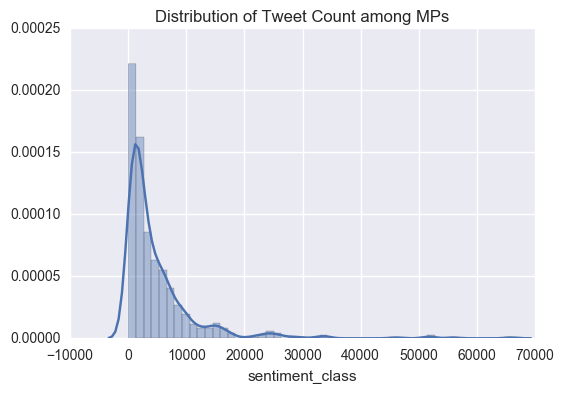

In [92]:
#Have a wuick look at the distributions of tweet count among mps

plt.title('Distribution of Tweet Count among MPs')
plt.xlabel('Tweet Count')

sns.distplot(grouped_count['sentiment_class'])

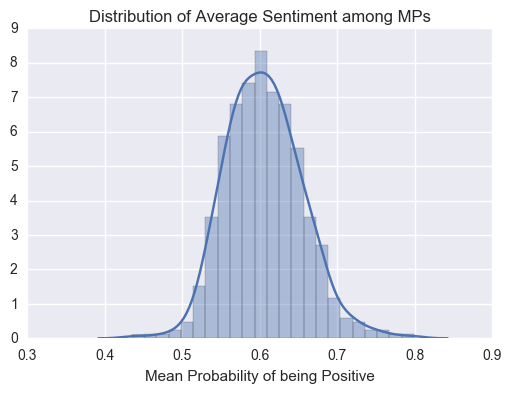

In [69]:
sns.distplot(grouped_mean['positive_prob'])

plt.title('Distribution of Average Sentiment among MPs')
plt.xlabel('Mean Probability of being Positive')

In [89]:
# Create a merged dataframe so we can exclude mps with very low tweet counts if necessary

grouped_merged = grouped_mean.merge(grouped_count[['sentiment_class']], left_index=True, right_index=True)

In [91]:
grouped_merged.columns = ['sentiment_class_x', 'positive_prob', 'tweet_count']

grouped_merged.head()

,sentiment_class_x,positive_prob,tweet_count
user_name,,,
abridgen,0.620879,0.563688,546
acunninghammp,0.553546,0.527888,6910
adamafriyie,0.797238,0.647312,1376
adamhollowaymp,0.750000,0.576706,4
adrianbaileymp,0.766667,0.660328,30


In [96]:
grouped_merged.sort_values('positive_prob').head()

,sentiment_class_x,positive_prob,tweet_count
user_name,,,
jonathanlord,0.000000,0.434738,1
rogergodsiff,0.419856,0.461603,836
billcashmp,0.419355,0.479382,93
spellar,0.478265,0.489714,9616
johnmannmp,0.486601,0.497804,4963


In [97]:
#lets exclude mps with < 80 tweets

grouped_merged = grouped_merged[grouped_merged['tweet_count'] >79]

In [98]:
# Most negative tweeters

grouped_merged.sort_values('positive_prob').head(25)

,sentiment_class_x,positive_prob,tweet_count
user_name,,,
rogergodsiff,0.419856,0.461603,836
billcashmp,0.419355,0.479382,93
spellar,0.478265,0.489714,9616
johnmannmp,0.486601,0.497804,4963
bwallacemp,0.504367,0.506027,1832
paulflynnmp,0.517097,0.508335,9066
grahamjones_mp,0.521781,0.511033,7231
mpritcharduk,0.531851,0.514246,2339
chrislesliemp,0.506657,0.514957,1352


In [99]:
# Most positive tweeters

grouped_merged.sort_values('positive_prob', ascending=False).head(25)

,sentiment_class_x,positive_prob,tweet_count
user_name,,,
albertocostamp,0.925926,0.757051,1161
morton_wendy,0.926316,0.751810,665
suellafernandes,0.897410,0.748648,1004
rehman_chishti,0.892392,0.730674,2379
alexchalkchelt,0.849624,0.728514,532
rushanaraali,0.840368,0.723412,1848
maryrobinson01,0.882915,0.721683,837
angelacrawley30,0.867273,0.716562,3187
jessicamordenmp,0.850365,0.715998,1096


## Biggest Sentiment Spread

In which days did the Labour and Conservative parties have the biggest difference in average sentiment?

In [122]:
grouped = mp_tweets[['positive_prob', 'year_month', 'party_new']].groupby(['year_month', 'party_new']).mean()

In [123]:
grouped.reset_index(inplace=True)
grouped['year_month'] =pd.to_datetime(grouped['year_month'])

In [124]:
grouped = grouped[(grouped['year_month'] < '2017-12-01') & (grouped['year_month'] > '2010-01-01') ]
time_data = grouped.pivot_table(index='year_month', columns='party_new')

time_data.columns = time_data.columns.droplevel()

In [125]:
def labour_con_spread(row):
    
    labour = row['Labour']
    con = row['Conservative']
    
    if pd.isna(labour) or pd.isna(con):
        
        return np.nan
    
    else:
        
        return np.sqrt(np.square(con - labour))

In [126]:
time_data['lab_con_diff'] = time_data.apply(labour_con_spread, axis=1)

In [128]:
time_data.sort_values('lab_con_diff', ascending=False).head(10)

party_new,Conservative,Democratic Unionist Party,Green,Labour,Liberal Democrat,Plaid Cymru,Scottish National Party,Sinn Fein,lab_con_diff
year_month,,,,,,,,,
2016-07-01,0.629284,0.582962,0.569923,0.569295,0.601446,0.531444,0.565817,0.590500,0.059989
2017-11-01,0.622215,0.583567,0.537723,0.566734,0.564674,0.551833,0.578190,0.626902,0.055481
2017-10-01,0.619130,0.575090,0.571839,0.566564,0.559005,0.544698,0.574424,0.592323,0.052565
2017-03-01,0.613891,0.559242,0.597033,0.567766,0.605488,0.517161,0.570616,0.596062,0.046125
2015-10-01,0.613350,0.610842,0.634533,0.567325,0.624936,0.514443,0.584818,0.608369,0.046025
2016-08-01,0.613330,0.585864,0.588044,0.569309,0.609412,0.522577,0.601093,0.622541,0.044021
2016-11-01,0.613350,0.572571,0.595817,0.573619,0.592887,0.522380,0.594174,0.603923,0.039730
2016-03-01,0.598049,0.604567,0.594266,0.559124,0.599514,0.519031,0.588423,0.589084,0.038926
2017-01-01,0.601579,0.547294,0.595361,0.562829,0.612133,0.522302,0.558882,0.582186,0.038750


None of these days really stand out for me.

Conservatives seem to always be ahead in positivity tweet wise. Are there any days in which this is not the case?

In [129]:
time_data[time_data['Conservative'] < time_data['Labour']]

party_new,Conservative,Democratic Unionist Party,Green,Labour,Liberal Democrat,Plaid Cymru,Scottish National Party,Sinn Fein,lab_con_diff
year_month,,,,,,,,,
2010-02-01,0.566934,0.526824,0.623725,0.575705,0.542693,0.554743,0.543565,0.580810,0.008771
2010-03-01,0.559875,0.578097,0.660713,0.576917,0.568489,0.535161,0.542322,0.592093,0.017042
2010-09-01,0.587432,0.523474,0.632129,0.587464,0.570267,0.502657,0.558056,0.561377,0.000033
2015-08-01,0.606248,0.640942,0.652237,0.612753,0.631143,0.536980,0.625409,0.605656,0.006505
2017-06-01,0.628584,0.594884,0.584314,0.640024,0.681124,0.575756,0.634127,0.635364,0.011440


## Gender Differences

/Applications/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

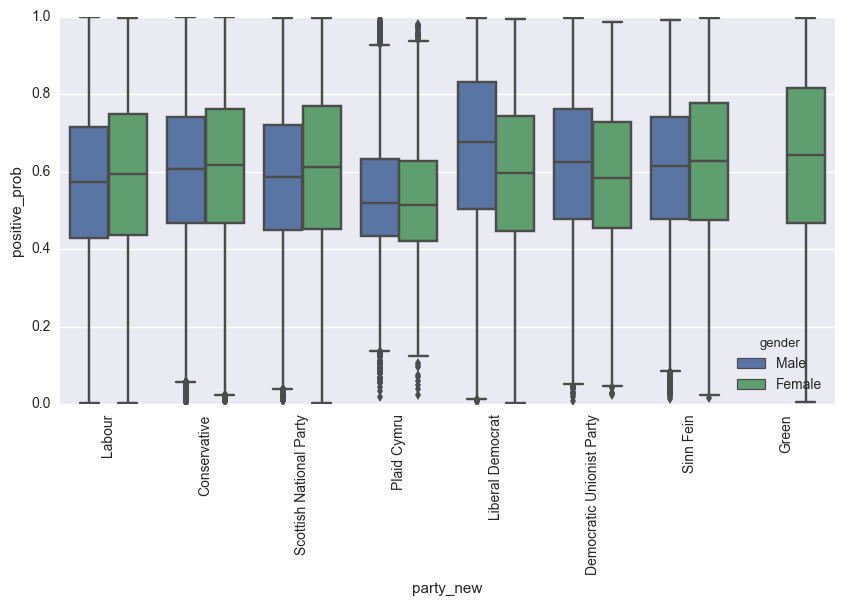

In [137]:
fix, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='party_new', y='positive_prob', data=mp_tweets, hue='gender')
plt.xticks(rotation='vertical')

/Applications/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(0.0, 1.0)

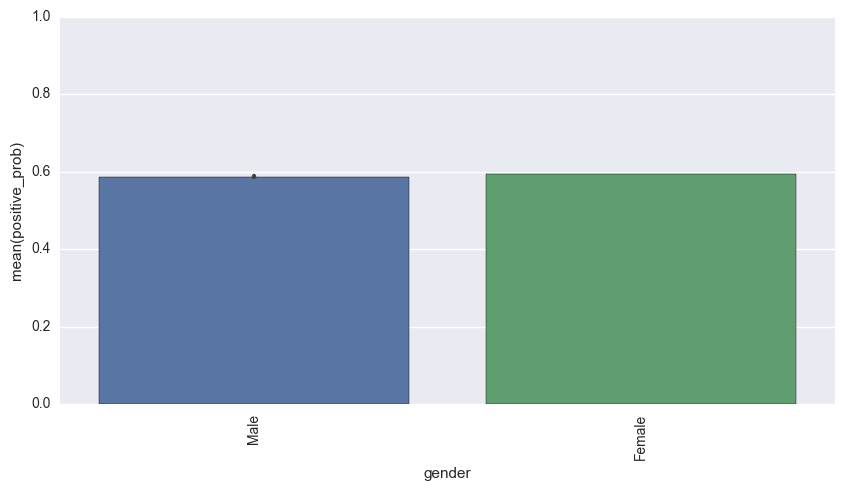

In [140]:
fix, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='gender', y='positive_prob', data=mp_tweets)
plt.xticks(rotation='vertical')
plt.ylim(0.0, 1.0)